In [6]:
import statsmodels.api as sm
import pandas as pd
import streamlit as st
from plotly import graph_objects as go
import time
import numpy as np


In [44]:
df = pd.read_excel('df_macro_acoes_pivotado.xlsx',index_col='DATA')
df
# df.set_index('DATA', inplace=True,drop=True)
# df.columns

,Unnamed: 0,ABEV3,AESB3,ALPA4,ALSO3,ANIM3,ASAI3,AZUL4,B3SA3,BBSE3,...,UGPA3,USIM5,VALE3,VAMO3,VIVT3,WEGE3,YDUQ3,IPCA,SELIC,USD
DATA,,,,,,,,,,,,,,,,,,,,,
2023-01-31,0,13.66,10.10,13.61,18.01,4.42,19.65,11.85,12.96,37.78,...,13.19,8.53,94.51,14.62,41.82,38.24,10.33,0.0053,0.0112,5.0987
2023-02-28,1,13.39,9.92,9.43,17.08,3.19,18.14,7.13,10.55,34.21,...,13.18,6.83,85.32,13.28,38.94,39.16,7.05,0.0084,0.0092,5.2072
2023-03-31,2,14.33,9.94,8.15,17.60,2.51,15.54,12.03,10.35,32.51,...,13.96,7.29,80.29,13.35,38.66,40.55,7.05,0.0071,0.0117,5.0798
2023-04-30,3,14.16,10.68,7.41,18.64,2.31,12.29,10.86,11.68,34.31,...,14.44,7.20,72.40,12.22,41.12,41.12,8.12,0.0061,0.0092,5.0001
2023-05-31,4,14.41,12.18,10.44,21.67,2.99,10.75,16.85,13.32,30.93,...,16.93,7.02,63.81,12.87,40.00,37.61,14.07,0.0023,0.0112,5.0953
2023-06-30,5,15.41,12.25,9.30,24.65,4.19,13.75,21.86,14.61,30.77,...,18.89,7.07,64.22,12.11,43.27,37.75,19.82,-0.0008,0.0107,4.8186


In [45]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [46]:
df.columns

Index(['ABEV3', 'AESB3', 'ALPA4', 'ALSO3', 'ANIM3', 'ASAI3', 'AZUL4', 'B3SA3',
       'BBSE3', 'BEEF3', 'BPAC11', 'BRFS3', 'BRKM5', 'CBAV3', 'CCRO3', 'CEAB3',
       'CIEL3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3',
       'CSMG3', 'CSNA3', 'CVCB3', 'CYRE3', 'DIRR3', 'ECOR3', 'EGIE3', 'EMBR3',
       'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GMAT3', 'GOLL4',
       'HAPV3', 'HYPE3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'LWSA3',
       'MGLU3', 'MLAS3', 'MOVI3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'ODPV3',
       'PCAR3', 'PETR4', 'PETZ3', 'POMO4', 'PRIO3', 'PSSA3', 'QUAL3', 'RADL3',
       'RAIL3', 'RAIZ4', 'RDOR3', 'RECV3', 'RENT3', 'RRRP3', 'SANB11', 'SBSP3',
       'SIMH3', 'SMTO3', 'SOMA3', 'STBP3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3',
       'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VIVT3', 'WEGE3', 'YDUQ3',
       'IPCA', 'SELIC', 'USD'],
      dtype='object')

In [47]:
df[['SELIC', 'IPCA']]

,SELIC,IPCA
DATA,,
2023-01-31,0.0112,0.0053
2023-02-28,0.0092,0.0084
2023-03-31,0.0117,0.0071
2023-04-30,0.0092,0.0061
2023-05-31,0.0112,0.0023
2023-06-30,0.0107,-0.0008


In [48]:
df_pivotado_pct_change = df[['ABEV3', 'AESB3', 'ALPA4', 'ALSO3', 'ANIM3', 'ASAI3', 'AZUL4', 'B3SA3',
       'BBSE3', 'BEEF3', 'BPAC11', 'BRFS3', 'BRKM5', 'CBAV3', 'CCRO3', 'CEAB3',
       'CIEL3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3',
       'CSMG3', 'CSNA3', 'CVCB3', 'CYRE3', 'DIRR3', 'ECOR3', 'EGIE3', 'EMBR3',
       'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GMAT3', 'GOLL4',
       'HAPV3', 'HYPE3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'LWSA3',
       'MGLU3', 'MLAS3', 'MOVI3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'ODPV3',
       'PCAR3', 'PETR4', 'PETZ3', 'POMO4', 'PRIO3', 'PSSA3', 'QUAL3', 'RADL3',
       'RAIL3', 'RAIZ4', 'RDOR3', 'RECV3', 'RENT3', 'RRRP3', 'SANB11', 'SBSP3',
       'SIMH3', 'SMTO3', 'SOMA3', 'STBP3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3',
       'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VIVT3', 'WEGE3', 'YDUQ3', 'USD']].pct_change()
df_pivotado_pct_change['SELIC'] = df['SELIC']
df_pivotado_pct_change['IPCA'] = df['IPCA']


In [49]:
df_pivotado_pct_change.dropna(inplace=True)

In [50]:
df_pivotado_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2023-02-28 to 2023-06-30
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ABEV3   5 non-null      float64
 1   AESB3   5 non-null      float64
 2   ALPA4   5 non-null      float64
 3   ALSO3   5 non-null      float64
 4   ANIM3   5 non-null      float64
 5   ASAI3   5 non-null      float64
 6   AZUL4   5 non-null      float64
 7   B3SA3   5 non-null      float64
 8   BBSE3   5 non-null      float64
 9   BEEF3   5 non-null      float64
 10  BPAC11  5 non-null      float64
 11  BRFS3   5 non-null      float64
 12  BRKM5   5 non-null      float64
 13  CBAV3   5 non-null      float64
 14  CCRO3   5 non-null      float64
 15  CEAB3   5 non-null      float64
 16  CIEL3   5 non-null      float64
 17  CMIG4   5 non-null      float64
 18  CMIN3   5 non-null      float64
 19  COGN3   5 non-null      float64
 20  CPFE3   5 non-null      float64
 21  CPLE6   5 non-null    

<Axes: xlabel='YDUQ3', ylabel='ALSO3'>

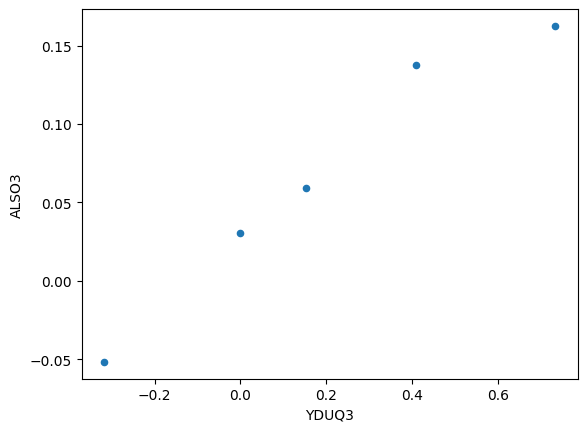

In [55]:
(df_pivotado_pct_change[['YDUQ3', 'ALSO3']]).plot(kind='scatter', x='YDUQ3', y='ALSO3')

In [57]:
df_pivotado_pct_change.to_excel('df_pivotado_pct_change.xlsx')

In [60]:
data = {
    'DATA': pd.date_range('2023-01-01', '2023-06-30', freq='M'),
    'PAPEL': ['ABEV3', 'ABEV3', 'AESB3', 'AESB3', 'ALPA4', 'ALPA4'],
    'SETOR ECONÔMICO': ['Consumo Não Cíclico', 'Consumo Não Cíclico', 'Utilidade Pública', 'Utilidade Pública', 'Consumo Cíclico', 'Consumo Cíclico'],
    'PREÇO': np.random.rand(6) * 100,  # Preços aleatórios para ilustração
    'RETORNOS_DIÁRIOS': np.random.randn(6),
    'IPCA': np.random.rand(6),
    'SELIC': np.random.rand(6),
    'USD': np.random.rand(6),
}

df = pd.DataFrame(data)

df

,DATA,PAPEL,SETOR ECONÔMICO,PREÇO,RETORNOS_DIÁRIOS,IPCA,SELIC,USD
0,2023-01-31,ABEV3,Consumo Não Cíclico,92.337674,-0.004255,0.467040,0.531311,0.196170
1,2023-02-28,ABEV3,Consumo Não Cíclico,65.937610,2.414674,0.375741,0.295124,0.216573
2,2023-03-31,AESB3,Utilidade Pública,28.396399,1.646788,0.986906,0.018204,0.542114
3,2023-04-30,AESB3,Utilidade Pública,96.928102,-0.093293,0.651171,0.787175,0.164483
4,2023-05-31,ALPA4,Consumo Cíclico,77.961204,-0.596688,0.422079,0.831901,0.083821
5,2023-06-30,ALPA4,Consumo Cíclico,83.939982,-0.862175,0.598210,0.493356,0.596340


In [52]:
dados = [
    [-0.3175, -0.0516],
    [0.0000, 0.0304],
    [0.1518, 0.0591],
    [0.7328, 0.1626],
    [0.4087, 0.1375]
]

# Converter para uma matriz NumPy
matriz_dados = np.array(df_pivotado_pct_change)

# Calcular a correlação
correlacao = np.corrcoef(matriz_dados, rowvar=False)

# Exibir a correlação
print(correlacao)

[[ 1.         -0.23483985  0.06770235 ... -0.73601335  0.82719404
  -0.51339211]
 [-0.23483985  1.          0.91837331 ...  0.35833282  0.16133154
  -0.31091179]
 [ 0.06770235  0.91837331  1.         ...  0.27536152  0.48095215
  -0.48819392]
 ...
 [-0.73601335  0.35833282  0.27536152 ...  1.         -0.27102266
   0.51344603]
 [ 0.82719404  0.16133154  0.48095215 ... -0.27102266  1.
  -0.37671845]
 [-0.51339211 -0.31091179 -0.48819392 ...  0.51344603 -0.37671845
   1.        ]]


In [62]:
data = {
    'DATA': pd.date_range('2023-01-01', '2023-06-30', freq='M'),
    'USD': np.random.rand(6) * 5,  # Dados fictícios para ilustração
    'IPCA': np.random.rand(6) * 1,
    'SELIC': np.random.rand(6) * 2,
}

df = pd.DataFrame(data)

# Função para destacar valores específicos
def destaque_valor(val):
    return f'background-color: {"yellow" if val > 0.98 else ""};'

# Aplicando a formatação condicional às colunas relevantes
df_destacado = df.style.applymap(destaque_valor, subset=['USD', 'IPCA', 'SELIC'])

# Exibindo o DataFrame destacado
df_destacado

C:\Users\math_\AppData\Local\Temp\ipykernel_14236\1376811292.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_destacado = df.style.applymap(destaque_valor, subset=['USD', 'IPCA', 'SELIC'])


,DATA,USD,IPCA,SELIC
0,2023-01-31 00:00:00,4.811808,0.833887,1.872557
1,2023-02-28 00:00:00,4.564235,0.294616,0.999415
2,2023-03-31 00:00:00,1.698938,0.811177,1.715759
3,2023-04-30 00:00:00,1.939384,0.840819,0.801585
4,2023-05-31 00:00:00,3.742651,0.404792,0.802478
5,2023-06-30 00:00:00,2.995231,0.541310,0.730706


In [67]:
_ = pd.read_excel('df_completo.xlsx')
_.set_index('DATA',inplace=True)
_

,PAPEL,NOME,PREÇO (R$),SETOR ECONÔMICO,SUBSETOR,SEGMENTO,IPCA,SELIC,USD,RETORNOS_SIMPLES,RETORNOS_LOGARITIMOS,RETORNOS_ACUMULADOS,SHARPE,MÉDIA,MÁXIMO DROW DOWN,MÁXIMO DROW DOWN bruto,VOLATILIDADE,RENTABILIDADE,GANHO BRUTO R$
DATA,,,,,,,,,,,,,,,,,,,
2023-01-31,ABEV3,AMBEV S/A,13.66,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,0.0053,0.0112,5.0987,NaN,NaN,NaN,1.928270,14.226667,-0.019766,-0.27,0.043101,0.128111,1.75
2023-02-28,ABEV3,AMBEV S/A,13.39,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,0.0084,0.0092,5.2072,-0.019766,-0.019964,-0.019766,1.928270,14.226667,-0.019766,-0.27,0.043101,0.128111,1.75
2023-03-31,ABEV3,AMBEV S/A,14.33,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,0.0071,0.0117,5.0798,0.070202,0.067847,0.049048,1.928270,14.226667,-0.019766,-0.27,0.043101,0.128111,1.75
2023-04-30,ABEV3,AMBEV S/A,14.16,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,0.0061,0.0092,5.0001,-0.011863,-0.011934,0.036603,1.928270,14.226667,-0.019766,-0.27,0.043101,0.128111,1.75
2023-05-31,ABEV3,AMBEV S/A,14.41,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,0.0023,0.0112,5.0953,0.017655,0.017501,0.054905,1.928270,14.226667,-0.019766,-0.27,0.043101,0.128111,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,YDUQ3,YDUQS PART,7.05,Consumo Cíclico,Diversos,Serviços Educacionais,0.0084,0.0092,5.2072,-0.317522,-0.382025,-0.317522,2.188639,11.073333,-0.317522,-3.28,0.399190,0.918683,9.49
2023-03-31,YDUQ3,YDUQS PART,7.05,Consumo Cíclico,Diversos,Serviços Educacionais,0.0071,0.0117,5.0798,0.000000,0.000000,-0.317522,2.188639,11.073333,-0.317522,-3.28,0.399190,0.918683,9.49
2023-04-30,YDUQ3,YDUQS PART,8.12,Consumo Cíclico,Diversos,Serviços Educacionais,0.0061,0.0092,5.0001,0.151773,0.141303,-0.213940,2.188639,11.073333,-0.317522,-3.28,0.399190,0.918683,9.49


In [74]:
_.columns
_['ret USD'] = _['USD'].pct_change()
_.dropna(inplace=True)
_.columns

Index(['PAPEL', 'NOME', 'PREÇO (R$)', 'SETOR ECONÔMICO', 'SUBSETOR',
       'SEGMENTO', 'IPCA', 'SELIC', 'USD', 'RETORNOS_SIMPLES',
       'RETORNOS_LOGARITIMOS', 'RETORNOS_ACUMULADOS', 'SHARPE', 'MÉDIA',
       'MÁXIMO DROW DOWN', 'MÁXIMO DROW DOWN bruto', 'VOLATILIDADE',
       'RENTABILIDADE', 'GANHO BRUTO R$', 'ret USD'],
      dtype='object')

In [76]:
columns_of_interest = ['SETOR ECONÔMICO', 'USD', 'IPCA', 'SELIC']

# Agrupa por setor econômico e calcule a correlação
correlation_by_sector = _[columns_of_interest].groupby('SETOR ECONÔMICO').corr()

# Exibe a tabela de correlação por setor econômico
st.dataframe(correlation_by_sector)

2024-02-21 16:11:02.973 
  command:

    streamlit run c:\Users\math_\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [77]:
pip install streamlit-extras

                                              0.0/69.8 kB ? eta -:--:--
     ---------------------------------------- 69.8/69.8 kB 1.9 MB/s eta 0:00:00
                                              0.0/680.8 kB ? eta -:--:--
     -----                                   92.2/680.8 kB 2.6 MB/s eta 0:00:01
     --------------------                   368.6/680.8 kB 4.5 MB/s eta 0:00:01
     --------------------------             481.3/680.8 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 680.8/680.8 kB 3.9 MB/s eta 0:00:00
                                              0.0/635.4 kB ? eta -:--:--
     --------                               143.4/635.4 kB 8.3 MB/s eta 0:00:01
     -------------------                    327.7/635.4 kB 5.0 MB/s eta 0:00:01
     ----------------------                 368.6/635.4 kB 3.3 MB/s eta 0:00:01
     -------------------------------------  634.9/635.4 kB 4.0 MB/s eta 0:00:01
     -------------------------------------- 635.4/635.4 kB 4.0

In [78]:
def example_one():
    chart_data = _get_random_data()
    with chart_container(chart_data):
        st.write("Here's a cool chart")
        st.area_chart(chart_data)

In [79]:
df_acoes = pd.DataFrame({
    'ACAO1': [1, 2, 3, 4, 5],
    'ACAO2': [2, 3, 4, 5, 6],
    # ... outras ações
})

# Substitua isso pelo seu DataFrame real de preços do dólar
df_dolar = pd.DataFrame({
    'USD': [10, 12, 15, 11, 14]
})

# Calcule a correlação entre as ações e o dólar
correlacao_acoes_dolar = df_acoes.corrwith(df_dolar['USD'])

# O resultado será uma Série de correlações para cada ação em relação ao dólar
print(correlacao_acoes_dolar)

ACAO1    0.533745
ACAO2    0.533745
dtype: float64


In [80]:
correlacao_acao1_acao2_dolar = df_acoes[['acao1', 'acao2']].corrwith(df_dolar['USD']).iloc[0]


KeyError: "None of [Index(['acao1', 'acao2'], dtype='object')] are in the [columns]"